# Logistic Regression to Predict Semiconductor Chip Quality

Machine Learning on Coursera week 2 exercise includes logistic regression with regularization to prevent overfitting. The data contains scores of the semiconductor cips on two tests and the result of their quality assurance (QA) evaluation. Our goal is to use this data so that given the test scores, we are able to predict whether the chip passes the QA evaluation.

## Part 1: Getting the data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import math
import scipy.optimize as op
import itertools

path = '/Users/archit-p/sources/coursera/machine-learning/machine-learning-ex2/ex2/ex2data2.txt'

In [3]:
f = open(path, 'r')

dataset = []

for line in f:
    fields = line.strip().split(',')
    fields[0] = float(fields[0])
    fields[1] = float(fields[1])
    fields[2] = int(fields[2])
    dataset.append(fields)

In [4]:
dataset[0:5]

[[0.051267, 0.69956, 1],
 [-0.092742, 0.68494, 1],
 [-0.21371, 0.69225, 1],
 [-0.375, 0.50219, 1],
 [-0.51325, 0.46564, 1]]

In [5]:
# transform takes features and transforms them to higher order features with highest order k
def transform(x, k):
    n = len(x)
    results = [1]
    for i in range(1, k + 1):
        power_pairs = [pair for pair in itertools.product(range(0, i + 1), repeat=n) if sum(pair) == i]
        for pair in power_pairs:
            cur = 1
            for i in range(n):
                cur *= x[i] ** pair[i]
            results.append(cur)
    return results

In [6]:
transform([1, 2], 6)

[1,
 2,
 1,
 4,
 2,
 1,
 8,
 4,
 2,
 1,
 16,
 8,
 4,
 2,
 1,
 32,
 16,
 8,
 4,
 2,
 1,
 64,
 32,
 16,
 8,
 4,
 2,
 1]

In [7]:
m = len(dataset)
n = len(dataset[0]) - 1

x = []
y = []

order = 6

for d in dataset:
    x.append(transform(d[:n], order))
    y.append(d[-1])

x = np.array(x)
y = np.array(y)

n = len(x[0]) - 1

The data now contains 28 features, since the two given features were scaled to order 6.

In [8]:
x[0:5]

array([[ 1.00000000e+00,  6.99560000e-01,  5.12670000e-02,
         4.89384194e-01,  3.58643425e-02,  2.62830529e-03,
         3.42353606e-01,  2.50892595e-02,  1.83865725e-03,
         1.34745327e-04,  2.39496889e-01,  1.75514423e-02,
         1.28625106e-03,  9.42624411e-05,  6.90798869e-06,
         1.67542444e-01,  1.22782870e-02,  8.99809795e-04,
         6.59422333e-05,  4.83255257e-06,  3.54151856e-07,
         1.17205992e-01,  8.58939846e-03,  6.29470940e-04,
         4.61305487e-05,  3.38066048e-06,  2.47750473e-07,
         1.81563032e-08],
       [ 1.00000000e+00,  6.84940000e-01, -9.27420000e-02,
         4.69142804e-01, -6.35227055e-02,  8.60107856e-03,
         3.21334672e-01, -4.35092419e-02,  5.89122275e-03,
        -7.97681228e-04,  2.20094970e-01, -2.98012201e-02,
         4.03513411e-03, -5.46363780e-04,  7.39785525e-05,
         1.50751849e-01, -2.04120477e-02,  2.76382476e-03,
        -3.74226408e-04,  5.06708697e-05, -6.86091891e-06,
         1.03255971e-01, -1.39

In [9]:
y[0:5]

array([1, 1, 1, 1, 1])

Plotting the data over a scatter plot gives us an idea of the distribution.

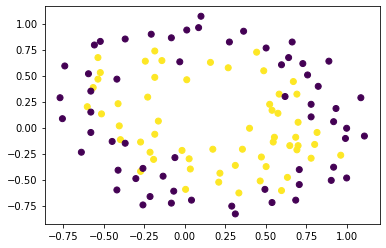

In [10]:
plt.scatter(x[:, 1], x[:, 2], c=y, cmap='viridis')
plt.show()

## Part 2: Regression and Minimization

In Part 2, we define the hypothesis, error and gradient functions and perform the minimization.

In [11]:
# sigmoid function f(z) = 1 / (1 + e^-z)
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [12]:
sigmoid(0)

0.5

In [13]:
# hypothesis function h(theta, xi) = theta^T . xi
def hypothesis(theta, xi):
    return sigmoid(np.matmul(np.transpose(theta), xi))

In [14]:
# mse or mean square error function gives the error in the given theta value
def mse(theta, lamda, x, y):
    sum = 0
    for i in range(m):
        sum -= y[i] * math.log(hypothesis(theta, x[i, :])) + (1 - y[i]) * math.log(1 - hypothesis(theta, x[i, :]))
    for i in range(1, n):
        sum += lamda * (theta[i] ** 2) / 2
    return sum / m

In [15]:
# gradient function gives the gradients for each theta
def gradient(theta, lamda, x, y):
    res = np.empty(n + 1)
    for j in range(n + 1):
        sum = 0
        for i in range(m):
            sum += x[i][j] * (hypothesis(theta, x[i, :]) - y[i])
        res[j] = sum / m
    for j in range(1, n):
        res[j] += lamda * theta[j] / m
    return res

In [16]:
mse(np.zeros(n + 1), 0.01, x, y)

0.6931471805599461

In [17]:
gradient(np.zeros(n + 1), 0.01, x, y).shape

(28,)

In [238]:
lamda = 1
result = op.minimize(fun = mse,
                        x0 = np.zeros(n + 1),
                        args = (lamda, x, y),
                        method = 'TNC',
                        jac = gradient);

theta = result.x

In [239]:
theta

array([ 1.27271026,  1.18111686,  0.62529964, -1.43166929, -0.91743189,
       -2.01987398, -0.17516291, -0.35725405, -0.36553118,  0.12393228,
       -1.19271297, -0.27469165, -0.61558557, -0.05098418, -1.45817009,
       -0.45645981, -0.29539513, -0.27778948, -0.04466179, -0.20603302,
       -0.24217842, -0.92467488, -0.14389149, -0.32742404,  0.01555759,
       -0.29244866,  0.02779373, -1.04319154])

## Part 3: Visualizing Decision Boundary

In Part 3, we visualize the decision boundary by calculating the prediction over a grid of x and y values.

In [240]:
xmin, xmax = -1, 1.5
ymin, ymax = -0.8, 1.2
step = 0.005

x_vals = np.arange(xmin, xmax, step)
y_vals = np.arange(ymin, ymax, step)

predictions = []

for yi in y_vals:
    pi = []
    for xi in x_vals:
        di = np.array(transform([xi, yi], order))
        pi.append(hypothesis(theta, di) >= 0.5)
    predictions.append(pi)

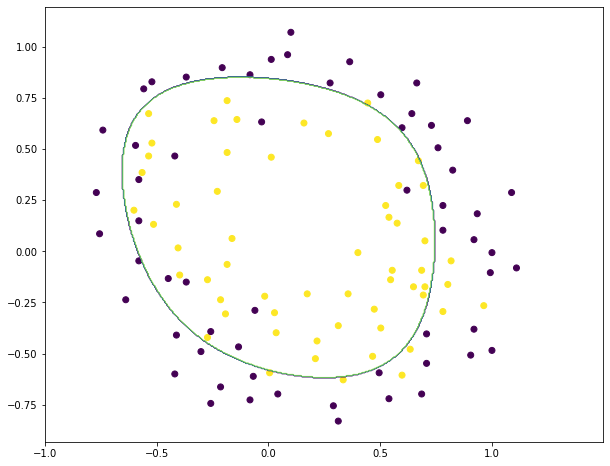

In [225]:
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 1], x[:, 2], c=y, cmap='viridis')
plt.contour(x_vals, y_vals, predictions, linewidths=0.5)
plt.show()